# Small tutorial on reading NetCDF files using xarray


In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


In [59]:
#norkyst_url = 'https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019071600.nc'
#barents_url = "https://thredds.met.no/thredds/dodsC/fou-hi/barents_eps_zdepth/barents_zdepth_20220715T00Zm00_AN.nc"
barents_url = "https://thredds.met.no/thredds/dodsC/fou-hi/barents_eps_eps/barents_eps_20230605T12Z.nc"

# If you download the file from thredds you can also give a local filename:
# barents_file = "netcdf_cache/barents_zdepth_20230319T00Zm00_AN.nc"

In [96]:
ds = xr.open_dataset(barents_url)
ds

<xarray.Dataset>
Dimensions:                  (ensemble_member: 6, s_rho: 42, s_w: 43, time: 67, X: 739, Y: 949, depth: 1)
Coordinates:
  * time                     (time) datetime64[ns] 2023-06-05T12:00:00 ... 20...
  * X                        (X) float32 2.786e+05 2.811e+05 ... 2.124e+06
  * Y                        (Y) float32 -8.979e+05 -8.954e+05 ... 1.472e+06
  * depth                    (depth) float64 0.0
  * ensemble_member          (ensemble_member) int32 12 13 14 15 16 17
    lon                      (Y, X) float64 ...
    lat                      (Y, X) float64 ...
Dimensions without coordinates: s_rho, s_w
Data variables: (12/23)
    hc                       (ensemble_member) float64 ...
    Cs_r                     (ensemble_member, s_rho) float64 ...
    Cs_w                     (ensemble_member, s_w) float64 ...
    forecast_reference_time  (ensemble_member) datetime64[ns] ...
    projection_lambert       (ensemble_member) int32 ...
    u                        (ensemble_member) int32 ...
    ...                       ...
    Uwind                    (time, ensemble_member, Y, X) float32 ...
    Vwind                    (time, ensemble_member, Y, X) float32 ...
    ice_concentration        (time, ensemble_member, Y, X) float32 ...
    ice_thickness            (time, ensemble_member, Y, X) float32 ...
    ice_u                    (time, ensemble_member, Y, X) float32 ...
    ice_v                    (time, ensemble_member, Y, X) float32 ...
Attributes: (12/33)
    file:                            /lustre/storeB/project/fou/hi/oper/baren...
    Conventions:                     CF-1.4, SGRID-0.3
    type:                            ROMS/TOMS history file
    title:                           Barents-2.5km - ROMS
    var_info:                        /home/havis/sea/ROMS/metroms_apps/barent...
    rst_file:                        /lustre/storeB/project/fou/hi/oper/baren...
    ...                              ...
    tiling:                          003x036
    ana_file:                        ROMS/Functionals/ana_btflux.h, ROMS/Func...
    CPP_options:                     BARENTS, ADD_FSOBC, ADD_M2OBC, ALBEDO, A...
    NCO:                             netCDF Operators version 5.1.0 (Homepage...
    history:                         Mon Jun  5 19:06:05 2023: ncpdq -O -a ti...
    DODS_EXTRA.Unlimited_Dimension:  time

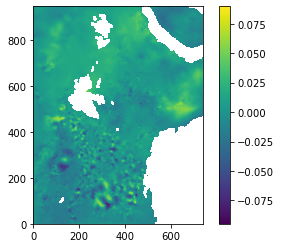

In [62]:
plt.imshow(ds.zeta.isel(ensemble_member=0, time=13).data - ds.zeta.isel(ensemble_member=4, time=13).data, origin='lower')
plt.colorbar()


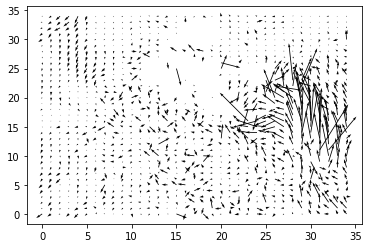

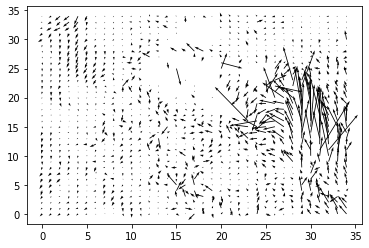

In [63]:
x0, x1 = 50, 400
y0, y1 = 300, 650


#ds.u.isel(depth=0, time=0, X=slice(x0,x1), Y=slice(y0, y1)).plot()
#plt.figure()
#ds.v.isel(depth=0, time=0, X=slice(x0,x1), Y=slice(y0, y1)).plot()

#print(type(ds.v.isel(depth=0, time=0, X=slice(x0,x1), Y=slice(y0, y1)).data))

plt.figure()
plt.quiver(ds.u_eastward.isel(ensemble_member=0, depth=0, time=0, X=slice(x0,x1), Y=slice(y0, y1)).data[::10, ::10],
           ds.v_northward.isel(ensemble_member=0, depth=0, time=0, X=slice(x0,x1), Y=slice(y0, y1)).data[::10,::10])

plt.figure()
plt.quiver(ds.u_eastward.isel(ensemble_member=2, depth=0, time=0, X=slice(x0,x1), Y=slice(y0, y1)).data[::10, ::10],
           ds.v_northward.isel(ensemble_member=2, depth=0, time=0, X=slice(x0,x1), Y=slice(y0, y1)).data[::10,::10])

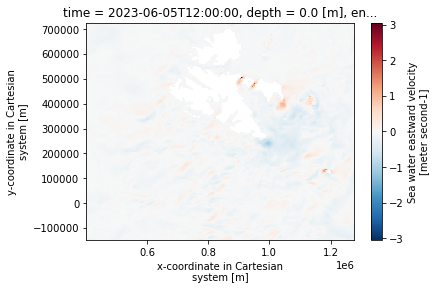

In [97]:
ds.u_eastward.isel(ensemble_member=0, time=0, X=slice(x0,x1), Y=slice(y0, y1)).plot()
          

In [100]:
ds.w.isel(ensemble_member=0, time=0, X=slice(x0,x1), Y=slice(y0, y1)).plot()


ValueError: Dimensions {'time', 'X', 'Y'} do not exist. Expected one or more of ('ensemble_member',)

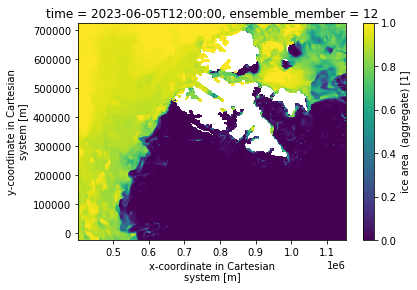

In [64]:
ds.ice_concentration.isel(time=0, ensemble_member=0, X=slice(50,350), Y=slice(350,650)).plot()



# Weather forecast

In [65]:
# https://thredds.met.no/thredds/catalog/meps25epsarchive/2023/06/06/catalog.html


meps_url = "https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/06/06/meps_lagged_6_h_subset_2_5km_20230606T00Z.nc"
ds = xr.open_dataset(meps_url)
ds.dims

Frozen({'time': 62, 'ensemble_member': 30, 'mean_sea_level': 1, 'surface': 1, 'pressure': 6, 'height_above_msl': 1, 'height0': 1, 'height1': 1, 'height2': 1, 'hybrid': 1, 'isotherm_0C_level': 1, 'x': 949, 'y': 1069})

In [68]:
ds.air_temperature_0m

<xarray.DataArray 'air_temperature_0m' (time: 62, height0: 1, ensemble_member: 30, y: 1069, x: 949)>
[1886934660 values with dtype=float32]
Coordinates:
  * time             (time) datetime64[ns] 2023-06-06 ... 2023-06-08T13:00:00
  * ensemble_member  (ensemble_member) int16 0 1 2 3 4 5 6 ... 24 25 26 27 28 29
  * height0          (height0) float32 0.0
  * x                (x) float32 -1.06e+06 -1.058e+06 ... 1.307e+06 1.31e+06
  * y                (y) float32 -1.333e+06 -1.33e+06 ... 1.335e+06 1.337e+06
    longitude        (y, x) float64 ...
    latitude         (y, x) float64 ...
Attributes:
    long_name:      Surface temperature (T0M)
    standard_name:  air_temperature
    units:          K
    grid_mapping:   projection_lambert
    _ChunkSizes:    [   1    1    1 1069  949]

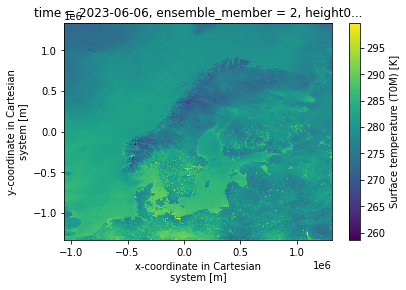

In [66]:
ds.air_temperature_0m.isel(time=0, ensemble_member=2).plot()

9.768273925781273
11.462457275390648
8.890985107421898
11.105249023437523
7.996179199218773
9.540338134765648
9.286218261718773
10.880548095703148
10.560479736328148
9.169976806640648


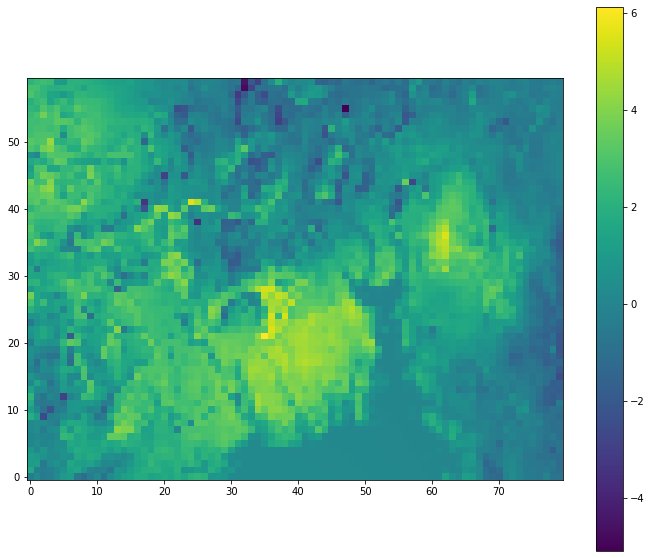

In [84]:
plt.figure(figsize=(12, 10))
plt.imshow(ds.air_temperature_0m.isel(time=0, ensemble_member=2, height0=0, x=slice(270, 350), y=slice(340,400)).data -
           ds.air_temperature_0m.isel(time=0, ensemble_member=7, height0=0, x=slice(270, 350), y=slice(340,400)).data, origin='lower') 
plt.colorbar()

def printTemp(ds, x, y, e):
    print(ds.air_temperature_0m.isel(time=0, ensemble_member=e, height0=0, x=x, y=y).data - 273.15)

for i in range(10):
    printTemp(ds, 310, 420, i)

In [90]:
ds.ensemble_member.size

30

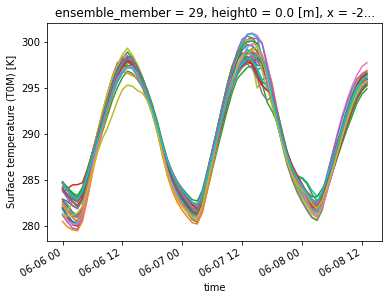

In [91]:
for e in range(ds.ensemble_member.size):
    ds.air_temperature_0m.isel(ensemble_member=e, height0=0, x=310, y=420).plot()

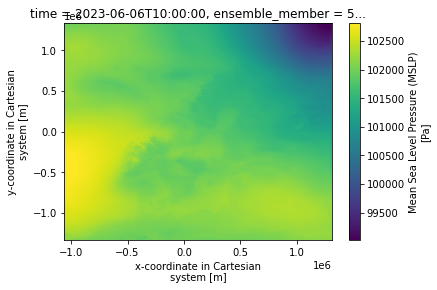

In [83]:
ds.air_pressure_at_sea_level.isel(time=10, ensemble_member=5).plot()

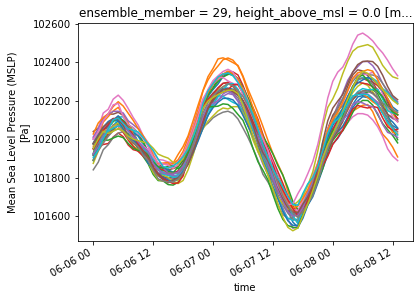

In [94]:
for e in range(ds.ensemble_member.size):
    ds.air_pressure_at_sea_level.isel(ensemble_member=e, x=310, y=420).plot()

In [104]:
np.random.normal(50, 5, 10)

array([45.94234071, 52.21202557, 51.74546942, 49.02130383, 52.59583433,
       49.20374089, 51.10874914, 52.35482797, 53.11756258, 48.86294365])